# Extraktion der Topics aus realen Searchlogs

- Hier sollen die realen Searchlogs genutzt werden, um Topics zu bilden

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RAW_DATA_PATH = "drive/MyDrive/Uni/Master/Masterthesis/Data/raw_data/"
PROD_DATA_PATH = "drive/MyDrive/Uni/Master/Masterthesis/Data/topics/"

In [ ]:
import pandas as pd

## Informationen zu den Searchlogs

Es gibt zwei JSON Dateien mit Searchlogs:

1. searches_1760195220648.json

  - Enthält Nutzeranfragen mit entsprechenden Ergebnissen

2. searchlogs_1760197490838.json

  - Enthält nur Anfragen von Nutzern

Wichtige Datenfelder in den Daten:

- items: Beschreibt den allgemeinen Inhalt der Anfrage (Wichtigste Feld!)
  - Allgemeine Suchanfrage
- branches: Filtert die allgemeine Anfrage nach verfügbaren Branchen
  - Filterung
- skills: Filtert die Anfrage nach verfügbaren Skills
  - Filterung




### Process Searches

In [ ]:
# read Searchlog 1
search_logs_one = pd.read_json(RAW_DATA_PATH + "searches_1760195220648.json")

print(search_logs_one.head())
len(search_logs_one)

In [ ]:
# Filter search logs where config contains at least one item entry.
search_logs_one_filtered = search_logs_one[
    search_logs_one['config'].apply(
        lambda x: len(x.get('items', [])) > 0
    )
]

# Output number of filtered log entries.
print(len(search_logs_one_filtered))

142


In [ ]:
# Extract unique item lists from filtered search logs.
# Convert each list to tuple to make it hashable for set operations.
unique_items_searches = set(
    tuple(item)
    for item in search_logs_one_filtered['config']
        .apply(lambda x: x.get('items', []))
)

# Print each unique item combination.
for item_list in unique_items_searches:
    print(item_list)

# Output summary statistics.
print(f"Anzahl einzigartiger Item-Listen: {len(unique_items_searches)}")
print(type(unique_items_searches))

('Logistik', 'IT-Systemadministration', 'Supply Chain Management', 'Information Technology')
('Anlagenbau',)
('Bau- und Ausbauhandwerk', 'Automatisierungstechnik', 'Holzhandwerk', 'Konstruktion', 'Maurern')
('Antriebstechnik', 'Anlagenbau', 'Benutzeroberflächen-Design', 'Datentechnik', 'Unternehmensführung', 'Softwareentwicklung', 'Programmiersprachen', 'Programmierkenntnisse', 'Product Management', 'Mechanik', 'Marketing', 'Ingenieurwesen', 'Geschäftsmodellentwicklung', 'Forschung', 'Fach- und Methodenkenntnisse', 'Elektrotechnik')
('Anlagenbau', 'Fahrzeug- und Maschinentechnik', 'Mechanik', 'Metallhandwerk', 'Schweißen')
('Communication', 'Finance', 'Networking', 'Customer Relationship Management', 'Public Relations', 'Business Development', 'Coaching', 'Business Process Analysis', 'Controlling')
('Business Development', 'Business Planning', 'Change Management', 'Marketing', 'Controlling', 'Budget Planning', 'Coaching', 'Cost Analysis and Control', 'Data Analysis', 'Finance', 'Financ

### Process Searchlogs

In [ ]:
# Load search log dataset (queries only, no results included).
search_logs_two = pd.read_json(
    RAW_DATA_PATH + "searchlogs_1760197490838.json"
)

# Display first rows for initial inspection.
print(search_logs_two.head())

                                    _id                             createdBy  \
0  {'$oid': '68a62c8be969baae4e9d095f'}  {'$oid': '65b00ae03897d6f0e6512d70'}   
1  {'$oid': '68a62c94e969baae4e9d0998'}  {'$oid': '65b00ae03897d6f0e6512d70'}   
2  {'$oid': '68a62cade969baae4e9d09bb'}  {'$oid': '65b00ae03897d6f0e6512d70'}   
3  {'$oid': '68a62cade969baae4e9d09cb'}  {'$oid': '65b00ae03897d6f0e6512d70'}   
4  {'$oid': '68a62cdbe969baae4e9d0a5c'}  {'$oid': '65b00ae03897d6f0e6512d70'}   

                              updatedBy branches  distance excluded included  \
0  {'$oid': '65b00ae03897d6f0e6512d70'}       []      20.0       []       []   
1  {'$oid': '65b00ae03897d6f0e6512d70'}       []     100.0       []       []   
2  {'$oid': '65b00ae03897d6f0e6512d70'}       []     100.0       []       []   
3  {'$oid': '65b00ae03897d6f0e6512d70'}       []     100.0       []       []   
4  {'$oid': '65b00ae03897d6f0e6512d70'}       []      20.0       []       []   

                  items skills  

In [ ]:
# Filter search logs that contain at least one item entry.
search_logs_two_filtered = search_logs_two[
    search_logs_two['items'].apply(lambda x: len(x) > 0)
]

# Output number of filtered log entries.
print(len(search_logs_two_filtered))

7740


In [ ]:
# Extract unique item combinations from filtered search logs.
# Convert lists to tuples to enable set-based deduplication.
unique_items_searchlogs = set(
    tuple(item)
    for item in search_logs_two_filtered['items']
)

# Print each unique item combination.
for item_list in unique_items_searchlogs:
    print(item_list)

# Return total number of unique item lists.
len(unique_items_searchlogs)

('Logistik', 'IT-Systemadministration', 'Supply Chain Management', 'Information Technology')
('Anlagenbau',)
('tim holterhoff', 'joe andriessen')
('Personalmanagement',)
('Bau- und Ausbauhandwerk', 'Automatisierungstechnik', 'Holzhandwerk', 'Konstruktion', 'Maurern')
('akademie',)
('pump',)
('Antriebstechnik', 'Anlagenbau', 'Benutzeroberflächen-Design', 'Datentechnik', 'Unternehmensführung', 'Softwareentwicklung', 'Programmiersprachen', 'Programmierkenntnisse', 'Product Management', 'Mechanik', 'Marketing', 'Ingenieurwesen', 'Geschäftsmodellentwicklung', 'Forschung', 'Fach- und Methodenkenntnisse', 'Elektrotechnik')
('Business Development', 'Customer Relationship Management', 'Sales', 'Anlagenbau', 'Antriebstechnik', 'Automatisierungstechnik', 'Fahrzeug- und Maschinentechnik', 'Ingenieurwesen', 'Konstruktion', 'Mechanik', 'Metallhandwerk', 'Prototyping', 'Schweißen', 'Trockenbau & Innenausbau', 'Supply Chain Management', 'Stein- und Plattenlegehandwerk', 'Sanitär- und Versorgungstechni

299

### Combine Searchlogs

In [ ]:
combined_unique_items = unique_items_searches.union(unique_items_searchlogs)

print(f"Anzahl einzigartiger Item-Listen (kombiniert): {len(combined_unique_items)}")
print("Einige der kombinierten einzigartigen Item-Listen:")

len(combined_unique_items)

print()

Anzahl einzigartiger Item-Listen (kombiniert): 299
Einige der kombinierten einzigartigen Item-Listen:



## Analyse und Bereinigung der Daten

In [ ]:
!pip install sentence-transformers

### Cleaning der Suchanfragen

In [ ]:
blacklist = [
    ('Unternehmen', 'mayweg'),
    ('griese',),
    ('bonn',),
    ('Franz hand',),
    ('fel',),
    ('Pieper',),
    ('elek',),
    ('Yasin',),
    ('Schmallenberg',),
    ('Schützen',),
    ('norman',),
    ('deutsch',),
    ('dänisch',),
    ('dänemark'),
    ('Metell',),
    ('pump',),
]

In [ ]:
# Print current number of unique item combinations.
print(f"Anzahl einzigartiger Item-Listen (aktuell in filtered_logs): {len(combined_unique_items)}")

# Canonicalize each tuple:
# - remove internal duplicates
# - sort elements for deterministic representation
cleaned_and_canonical_logs = set()

for item_tuple in combined_unique_items:
    cleaned_tuple = tuple(sorted(set(item_tuple)))
    cleaned_and_canonical_logs.add(cleaned_tuple)

# Replace original set with canonicalized version.
original_length = len(combined_unique_items)
unique_logs = cleaned_and_canonical_logs

print(f"Anzahl einzigartiger Item-Listen (nach interner Deduplizierung und Kanonisierung): {len(unique_logs)}")

# Report whether additional duplicates were removed during canonicalization.
if original_length > len(unique_logs):
    print(f"Es wurden {original_length - len(unique_logs)} Duplikate (nach Kanonisierung) entfernt.")
else:
    print("Keine weiteren Duplikate nach interner Deduplizierung oder Kanonisierung gefunden.")

# Display sample of canonicalized item lists.
print("Einige der gefilterten und deduplizierten einzigartigen Item-Listen:")
for i, item_list in enumerate(list(unique_logs)[:5]):
    print(item_list)

Anzahl einzigartiger Item-Listen (aktuell in filtered_logs): 299
Anzahl einzigartiger Item-Listen (nach interner Deduplizierung und Kanonisierung): 294
Es wurden 5 Duplikate (nach Kanonisierung) entfernt.
Einige der gefilterten und deduplizierten einzigartigen Item-Listen:
('Anlagenbau',)
('Communication', 'IT-Management', 'Knowledge Management', 'Networking', 'Operations Management', 'Softwareentwicklung', 'Unternehmensführung', 'Wissensmanagement')
('Personalmanagement',)
('akademie',)
('Business Analysis', 'Business Planning', 'Business Process Analysis', 'Change Management', 'Data Analysis', 'Digital Ethics', 'Planning', 'Projektmanagement', 'Strategy Planning')


In [ ]:
# Apply blacklist filtering to remove unwanted item combinations.
filtered_logs = set()

for item_tuple in unique_logs:
    if item_tuple not in blacklist:
        filtered_logs.add(item_tuple)

# Output number of remaining unique item lists.
print(f"Anzahl einzigartiger Item-Listen nach Blacklist-Filterung: {len(filtered_logs)}")
print("Einige der gefilterten einzigartigen Item-Listen:")

# Return final count.
len(filtered_logs)

Anzahl einzigartiger Item-Listen nach Blacklist-Filterung: 273
Einige der gefilterten einzigartigen Item-Listen:


273

In [ ]:
def tuple_to_sentence(items):
    # Remove internal duplicates while preserving original order.
    unique_items = []
    for it in items:
        if it not in unique_items:
            unique_items.append(it)

    # Join items into a comma-separated string.
    joined = ", ".join(unique_items)

    return joined

In [ ]:
import pandas as pd
import numpy as np

# Build structured query dataset from filtered item tuples.
data = []

for i, q in enumerate(filtered_logs):
    text = tuple_to_sentence(q)

    data.append({
        # Generate sequential topic ID (e.g., Q001, Q002, ...).
        "topic_id": f"Q{i+1:03d}",
        # Original tuple representation.
        "raw_tuple": q,
        # Human-readable query string.
        "query_text": text
    })

# Create DataFrame for downstream processing.
df_queries = pd.DataFrame(data)

# Preview generated queries.
print(df_queries.head())

  topic_id                                          raw_tuple  \
0     Q001                                      (Anlagenbau,)   
1     Q002  (Communication, IT-Management, Knowledge Manag...   
2     Q003  (Business Analysis, Business Planning, Busines...   
3     Q004                              (Personalmanagement,)   
4     Q005  (Anlagenbau, Fahrzeug- und Maschinentechnik, M...   

                                          query_text  
0                                         Anlagenbau  
1  Communication, IT-Management, Knowledge Manage...  
2  Business Analysis, Business Planning, Business...  
3                                 Personalmanagement  
4  Anlagenbau, Fahrzeug- und Maschinentechnik, Me...  


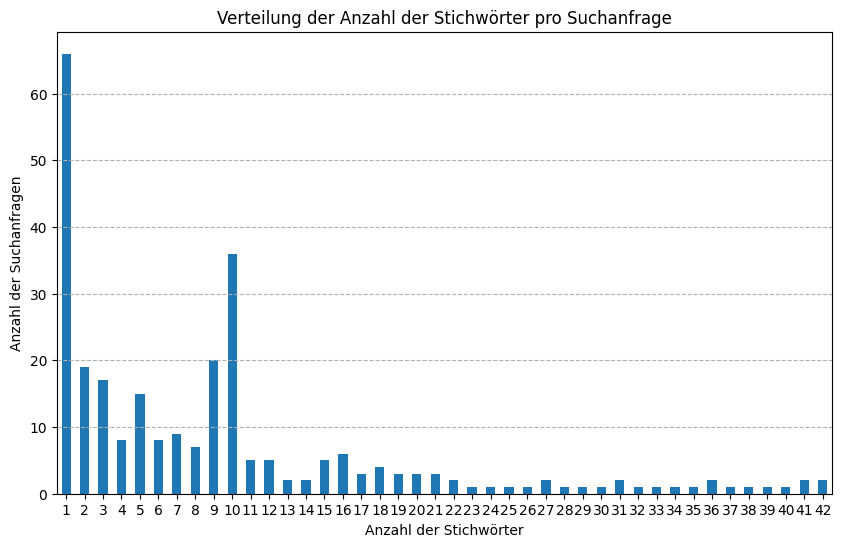

Verteilung der Stichwortanzahl pro Suchanfrage:
raw_tuple
1     66
2     19
3     17
4      8
5     15
6      8
7      9
8      7
9     20
10    36
11     5
12     5
13     2
14     2
15     5
16     6
17     3
18     4
19     3
20     3
21     3
22     2
23     1
24     1
25     1
26     1
27     2
28     1
29     1
30     1
31     2
32     1
33     1
34     1
35     1
36     2
37     1
38     1
39     1
40     1
41     2
42     2
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of keywords in each combination (raw_tuple)
keyword_counts = df_queries['raw_tuple'].apply(len)

# Get the distribution of these counts
distribution = keyword_counts.value_counts().sort_index()

# Create a plot
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar')
plt.title('Verteilung der Anzahl der Stichwörter pro Suchanfrage')
plt.xlabel('Anzahl der Stichwörter')
plt.ylabel('Anzahl der Suchanfragen')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print("Verteilung der Stichwortanzahl pro Suchanfrage:")
print(distribution)

In [ ]:
average_keywords_per_query = keyword_counts.median()
print(f"Durchschnittliche Anzahl der Stichwörter pro Suchanfrage: {average_keywords_per_query:.2f}")

Durchschnittliche Anzahl der Stichwörter pro Suchanfrage: 7.00


In [ ]:
df_queries_filtered_max_10_keywords = df_queries[df_queries['raw_tuple'].apply(len) <= 10]
print(df_queries_filtered_max_10_keywords.head())
print(f"Anzahl der Suchanfragen nach Filterung (maximal 10 Stichwörter): {len(df_queries_filtered_max_10_keywords)}")

  topic_id                                          raw_tuple  \
0     Q001                                      (Anlagenbau,)   
1     Q002  (Communication, IT-Management, Knowledge Manag...   
2     Q003  (Business Analysis, Business Planning, Busines...   
3     Q004                              (Personalmanagement,)   
4     Q005  (Anlagenbau, Fahrzeug- und Maschinentechnik, M...   

                                          query_text  
0                                         Anlagenbau  
1  Communication, IT-Management, Knowledge Manage...  
2  Business Analysis, Business Planning, Business...  
3                                 Personalmanagement  
4  Anlagenbau, Fahrzeug- und Maschinentechnik, Me...  
Anzahl der Suchanfragen nach Filterung (maximal 10 Stichwörter): 205


In [ ]:
keyword_counts_filtered = df_queries_filtered_max_10_keywords['raw_tuple'].apply(len)
keyword_counts_filtered.mean()


np.float64(4.726829268292683)

## Bilden von Topics aus Anfragen


### Bilden von Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

model_name = "sentence-transformers/distiluse-base-multilingual-cased-v2"
model = SentenceTransformer(model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
sentences = df_queries_filtered_max_10_keywords["query_text"].tolist()


In [ ]:

embeddings = model.encode(
    sentences,
    batch_size=32,
    convert_to_numpy=True,
    show_progress_bar=True
)

print(embeddings.shape)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

(205, 512)


In [ ]:
emb_df = pd.DataFrame(embeddings)
# Ensure correct alignment of topic_id with the 0-indexed embeddings DataFrame
emb_df["topic_id"] = df_queries_filtered_max_10_keywords["topic_id"].reset_index(drop=True)

# Oder alles zusammen in ein Dictionary packen
# Use enumerate to get a sequential index 'k' that matches the embeddings array's indexing
id2embedding = {
    row["topic_id"]: embeddings[k]
    for k, (_, row) in enumerate(df_queries_filtered_max_10_keywords.iterrows())
}

emb_df


,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,topic_id
0,-0.010227,0.017750,0.030968,0.044381,-0.010511,0.039533,-0.026544,-0.019477,0.009105,0.001523,...,0.033996,0.029620,-0.010370,-0.002021,-0.047932,0.011992,0.018745,-0.018837,0.051390,Q001
1,0.007625,0.013412,0.038449,-0.048747,0.057445,-0.015523,-0.003690,-0.031477,0.011941,0.012153,...,0.052970,0.002133,0.066994,0.001714,0.048533,0.087961,0.073154,-0.030836,-0.028256,Q002
2,0.010867,-0.005153,0.006205,-0.029208,-0.014101,0.003433,-0.000960,-0.010916,-0.030959,-0.029275,...,-0.023074,0.012398,0.005108,-0.068678,-0.071588,0.019274,0.003731,-0.030562,-0.002315,Q003
3,0.024608,-0.020285,-0.017081,-0.012990,-0.043327,0.012430,-0.049590,0.001386,-0.021242,-0.027904,...,-0.032906,0.003673,-0.017425,-0.021433,-0.021284,-0.022295,-0.008427,0.004185,-0.017128,Q004
4,0.007196,0.024862,-0.012330,-0.022069,-0.040063,0.004016,0.002155,-0.052754,-0.028082,-0.037600,...,-0.000938,0.003619,0.006255,-0.033575,-0.037025,-0.008538,-0.014137,0.020284,-0.008523,Q005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.036532,-0.077041,-0.026913,-0.002201,0.065211,0.009018,-0.037423,-0.007114,0.017057,0.000713,...,-0.004592,-0.041769,0.006161,-0.021075,0.002863,-0.056156,0.014377,-0.011310,0.022851,Q267
201,-0.023484,-0.027524,-0.045525,-0.029973,0.027302,0.070887,-0.052885,-0.072681,-0.066424,-0.003603,...,0.041666,0.002652,0.067644,-0.006394,-0.051274,0.012157,0.019906,0.044281,0.015143,Q269
202,0.006425,-0.009808,0.011080,0.000637,0.018410,-0.006143,0.069011,-0.014548,-0.036894,0.017702,...,-0.072054,0.024625,0.016694,0.007087,0.004223,-0.032904,0.030922,-0.012209,-0.126576,Q270
203,-0.033643,0.032012,-0.014284,-0.018561,-0.039051,-0.000958,0.034007,-0.010944,-0.007814,-0.006861,...,-0.017803,-0.034628,-0.005110,0.001986,0.025864,0.045960,-0.011844,-0.019055,-0.028305,Q271


## Clustering

In [ ]:
import numpy as np

# id2embedding: dict(topic_id -> embedding_vector)
topic_ids = list(id2embedding.keys())
X = np.vstack([id2embedding[tid] for tid in topic_ids])   # shape: (299, embedding_dim)

## HDBScan


In [ ]:
from hdbscan import HDBSCAN
import numpy as np

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
X = embeddings   # Shape: (n_queries, embedding_dim)
X

array([[-0.01022651,  0.01774986,  0.03096822, ...,  0.01874487,
        -0.01883693,  0.05139019],
       [ 0.0076247 ,  0.01341157,  0.03844903, ...,  0.07315449,
        -0.03083566, -0.02825628],
       [ 0.01086701, -0.00515257,  0.00620539, ...,  0.00373066,
        -0.03056217, -0.00231467],
       ...,
       [ 0.00642453, -0.00980771,  0.01108001, ...,  0.03092193,
        -0.01220898, -0.12657574],
       [-0.03364316,  0.03201231, -0.01428387, ..., -0.01184378,
        -0.01905515, -0.0283051 ],
       [-0.02531631, -0.02191767,  0.10847107, ...,  0.07264176,
        -0.00980945, -0.02315662]], dtype=float32)

In [ ]:
import umap
from hdbscan import HDBSCAN

# Ensure embeddings are float32 for compatibility and memory efficiency.
X = embeddings.astype(np.float32)

# Dimensionality reduction using UMAP (cosine space).
reducer = umap.UMAP(
    n_neighbors=12,
    n_components=10,
    metric="cosine",
    random_state=42
)
X_reduced = reducer.fit_transform(X)

# Density-based clustering on reduced space.
clusterer = HDBSCAN(
    min_cluster_size=4,
    min_samples=4,
    metric="euclidean",
    cluster_selection_method="eom"
)

labels = clusterer.fit_predict(X_reduced)

# Attach cluster labels to query DataFrame.
df_queries_filtered_max_10_keywords["cluster_hdbscan"] = labels

# Output cluster distribution (including noise label -1 if present).
print(
    df_queries_filtered_max_10_keywords["cluster_hdbscan"]
    .value_counts()
    .sort_index()
)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


cluster_hdbscan
-1     31
 0     13
 1     11
 2     30
 3      7
 4      8
 5     16
 6     12
 7      5
 8      8
 9     34
 10    10
 11     8
 12    12
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipython-input-1498751014.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queries_filtered_max_10_keywords["cluster_hdbscan"] = labels


In [ ]:
from sklearn.metrics import silhouette_score

# Exclude noise points labeled as -1 (HDBSCAN convention).
mask = labels != -1

# Compute silhouette score on clustered samples only.
sil_score = silhouette_score(
    X_reduced[mask],
    labels[mask]
)

print("Silhouette Score:", sil_score)

Silhouette Score: 0.52601737


In [ ]:
from datetime import datetime

# Generate timestamp for versioned output filename.
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # e.g., 20250226_153045

# Build dynamic filename and full output path.
filename = f"clustered_searchlogs_hdbscan_{timestamp}.csv"
filepath = f"{PROD_DATA_PATH}{filename}"

# Optional: persist clustered DataFrame.
# df_queries_filtered_max_10_keywords.to_csv(filepath, index=False)

# Confirm target path.
print(f"DataFrame df_queries wurde erfolgreich in {filepath} gespeichert.")

DataFrame df_queries wurde erfolgreich in drive/MyDrive/Uni/Master/Masterthesis/Data/topics/clustered_searchlogs_hdbscan_20251126_140452.csv gespeichert.


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-386710550.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_clusters)


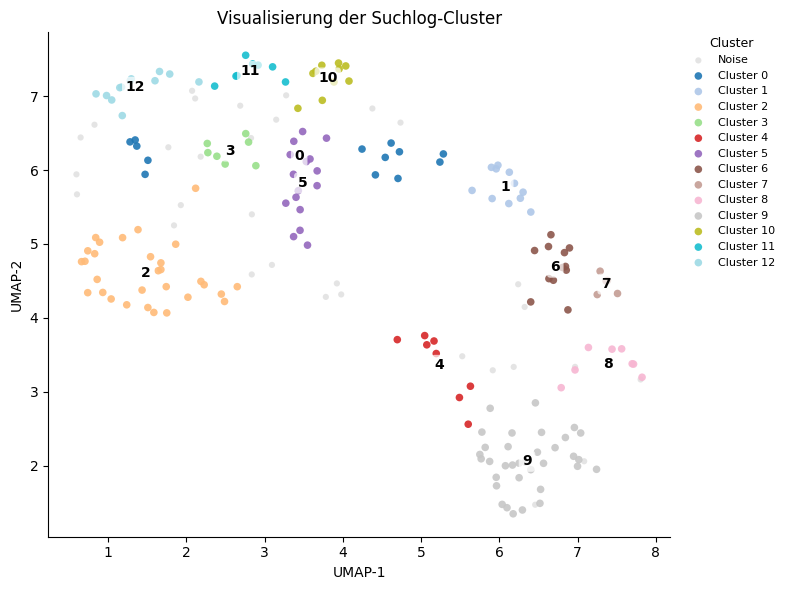

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1) 2D-UMAP for visualization only
# --------------------------------------------------
# Ensure float32 for performance and compatibility.
X = embeddings.astype(np.float32)

# Reduce embeddings to 2D (visualization space, not clustering space).
umap_2d = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    metric="cosine",
    random_state=42
).fit_transform(X)

# Retrieve cluster labels.
labels = df_queries_filtered_max_10_keywords["cluster_hdbscan"].to_numpy()
unique_labels = np.unique(labels)

# Prepare colormap (exclude noise label -1).
n_clusters = np.sum(unique_labels != -1)
cmap = plt.cm.get_cmap("tab20", n_clusters)

# --------------------------------------------------
# 2) Plot
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Plot noise points first (light gray).
noise_mask = labels == -1
ax.scatter(
    umap_2d[noise_mask, 0],
    umap_2d[noise_mask, 1],
    s=20,
    c="lightgray",
    alpha=0.6,
    label="Noise",
    edgecolor="none",
)

# Plot each cluster separately.
cluster_idx = 0
for lab in unique_labels:
    if lab == -1:
        continue

    mask = labels == lab

    ax.scatter(
        umap_2d[mask, 0],
        umap_2d[mask, 1],
        s=30,
        color=cmap(cluster_idx),
        alpha=0.9,
        edgecolor="none",
        label=f"Cluster {lab}",
    )

    # Compute cluster centroid and annotate with cluster ID.
    cx = umap_2d[mask, 0].mean()
    cy = umap_2d[mask, 1].mean()
    ax.text(
        cx,
        cy,
        str(lab),
        fontsize=10,
        fontweight="bold",
        ha="center",
        va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.7),
    )

    cluster_idx += 1

# --------------------------------------------------
# 3) Styling
# --------------------------------------------------
ax.set_title("Visualisierung der Suchlog-Cluster", fontsize=12)
ax.set_xlabel("UMAP-1", fontsize=10)
ax.set_ylabel("UMAP-2", fontsize=10)

# Remove top/right spines for cleaner look.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Place legend outside plot area.
leg = ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.,
    frameon=False,
    title="Cluster",
    fontsize=8,
)

if leg._legend_title_box:
    leg.get_title().set_fontsize(9)

plt.tight_layout()

# --------------------------------------------------
# 4) Optional: Export for thesis (PNG + PDF)
# --------------------------------------------------
# plt.savefig("umap_hdbscan_clusters.png", dpi=300, bbox_inches="tight")
# plt.savefig("umap_hdbscan_clusters.pdf", bbox_inches="tight")

plt.show()

## Extract and count terms for each cluster



In [ ]:
import pandas as pd

# Build file path for clustered search log dataset.
file_to_load = PROD_DATA_PATH + "clustered_searchlogs_hdbscan.csv"

# Load clustered queries into DataFrame.
df_queries_clustered = pd.read_csv(file_to_load)

In [ ]:
from collections import defaultdict

cluster_term_counts = {}

for cluster_id in sorted(df_queries_clustered['cluster_hdbscan'].unique()):
    # Filter df_queries for the current cluster
    cluster_df = df_queries_clustered[df_queries_clustered['cluster_hdbscan'] == cluster_id]

    # Initialize a temporary dictionary for term counts in the current cluster
    temp_term_counts = defaultdict(int)

    # Iterate through 'query_text' entries in the filtered DataFrame
    for query_text_entry in cluster_df['query_text']:
        # Split the string by ', ' to get individual terms
        terms = [term.strip() for term in query_text_entry.split(', ') if term.strip()]

        # Increment count for each term
        for term in terms:
            temp_term_counts[term] += 1

    # Store the temporary term frequency dictionary in cluster_term_counts
    cluster_term_counts[cluster_id] = dict(temp_term_counts)

# Display the term counts for each cluster
for cluster_id, counts in cluster_term_counts.items():
    print(f"\nCluster {cluster_id}:")
    # Sort terms by frequency in descending order and print top N
    sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
    for term, count in sorted_counts[:10]: # Display top 10 terms for brevity
        print(f"  '{term}': {count}")


Cluster -1:
  'Marketing': 15
  'Business Development': 12
  'Entrepreneurship': 8
  'Unternehmensführung': 7
  'Social Media Marketing': 6
  'Customer Relationship Management': 5
  'Public Relations': 5
  'Business Planning': 5
  'Projektmanagement': 5
  'Geschäftsmodellentwicklung': 5

Cluster 0:
  'Projektmanagement': 4
  'Logistik': 4
  'IT-Systemadministration': 3
  'Information Technology': 3
  'Wissensmanagement': 3
  'Networking': 3
  'Operations Management': 3
  'Unternehmensführung': 3
  'Ingenieurwesen': 3
  'Product Development': 2

Cluster 1:
  'Konstruktion': 7
  'Metallhandwerk': 7
  'Mechanik': 7
  'Automatisierungstechnik': 6
  'Elektrotechnik': 6
  'Fahrzeug- und Maschinentechnik': 6
  'Anlagenbau': 5
  'Antriebstechnik': 4
  'Installationstechnik': 3
  'Autodesk Inventor': 3

Cluster 2:
  'Experte für KI': 1
  'Kaffee': 1
  'Gastronom der sich mit Kaffee auskennt': 1
  'Ich suche einen Experten für KI': 1
  'Ich suche einen Spezielisten für Kaffee': 1
  '(Wieder-)Ei

## Cluster with relevant topic keywords

In [ ]:
relevant_cluster_keywords = {
    "cluster_0": ["IT-Systemadministration", "Information Technology", "Wissensmanagement"],
    "cluster_1": ["Konstruktion", "Metallhandwerk", "Mechanik", "Automatisierungstechnik", "Elektrotechnik"],
    "cluster_2": [""],
    "cluster_3": ["Maschinelles Lernen", "Vektordatenbanken", "KI", "Künstliche Intelligenz"],
    "cluster_4": ["automatisierung", "robotik"],
    "cluster_5": ["Public Relations", "Sales", "Social Media Marketing", "Softwareentwicklung"],
    "cluster_6": ["Marketing", "Social Media Marketing", "Brand Management", "Suchmaschinenmarketing (SEO & SEA / Google)"],
    "cluster_7": ["Business Development", "Employee Development", "Personalentwicklung und Mentoring", "Human Resources", "Coaching"],
    "cluster_8": ["Bau- und Ausbauhandwerk", "Stein- und Plattenlegehandwerk", "Holzhandwerk", "Anlagenbau"],
    "cluster_9": [""],
    "cluster_10": ["Business Planning", "Finance", "Financial Management", "Budget Planning", "Business Development"],
    "cluster_11": ["Change Management", "Business Planning", "Business Development", "Controlling"],
    "cluster_12": ["Cloud-Computing", "IT-Management", "Digital Ethics", "Datenbankverwaltung", "Softwareentwicklung", "Data Analysis"],
    "cluster_13": ["Change Management", "Digital Ethics", "Business Planning", "Business Development", "Business Process Analysis"],
}

## Validate Cluster Topics

Hier werden die erzeugten Cluster validiert, ob es zu den Stichwörten in den Clustern auch Experten gibt.

In [ ]:
PROFILES_DATA = "drive/MyDrive/Uni/Master/Masterthesis/Data/enhanced_expert_profiles.json"

In [ ]:
## load enhanced profile data
df_profiles = pd.read_json(PROFILES_DATA)
df_profiles.head()

In [ ]:
import re
import pandas as pd


def find_experts_for_cluster(
    cluster_id: str,
    keywords: list,
    df_profiles: pd.DataFrame,
    search_fields=None
):
    """
    Sucht für einen Cluster alle Expert:innen, deren Profile mindestens
    eines der Stichwörter aus 'keywords' enthalten.

    Es werden mehrere Textfelder durchsucht (default):
    - 'full_text'
    - 'skills'
    - 'projectsDescription'
    - 'description'

    Rückgabe:
    - Liste aller eindeutigen Experten-IDs im Cluster
    - Dict mit Statistiken pro Stichwort: Anzahl Expert:innen + IDs
    """

    # Default search fields if none provided.
    if search_fields is None:
        search_fields = ['full_text', 'skills', 'projectsDescription', 'description']

    found_experts = set()
    term_stats = {}

    for term in keywords:
        term = term.strip()

        # Skip empty terms.
        if not term:
            continue

        # Build case-insensitive word-boundary regex.
        pattern = r'\b' + re.escape(term) + r'\b'

        # Initialize boolean mask.
        mask = pd.Series(False, index=df_profiles.index)

        # Search across configured fields.
        for field in search_fields:
            if field not in df_profiles.columns:
                continue

            mask = mask | df_profiles[field] \
                .fillna('') \
                .str.contains(pattern, case=False, na=False)

        matching_profiles = df_profiles[mask]
        expert_ids = matching_profiles['id'].tolist()

        # Store per-term statistics.
        term_stats[term] = {
            'num_experts_found': len(expert_ids),
            'expert_ids': expert_ids
        }

        # Aggregate unique experts across terms.
        found_experts.update(expert_ids)

    return list(found_experts), term_stats


# Aggregate matching results per cluster.
expert_matching_results = {}

for cluster_id, keywords in relevant_cluster_keywords.items():
    experts, term_stats = find_experts_for_cluster(
        cluster_id,
        keywords,
        df_profiles
    )

    expert_matching_results[cluster_id] = {
        'num_experts_found_total': len(experts),
        'expert_ids_total': experts,
        'term_stats': term_stats
    }


# Print summary results.
for cluster_id, results in expert_matching_results.items():
    print(f"\n{cluster_id}:")
    print(f"  Anzahl Expert:innen im gesamten Cluster: {results['num_experts_found_total']}")
    print("  Experten pro Stichwort:")

    for term, stats in results['term_stats'].items():
        print(f"    - '{term}': {stats['num_experts_found']} Expert:innen")

    # Optional debugging:
    # for term, stats in results['term_stats'].items():
    #     print(f"    - '{term}': {stats['num_experts_found']} → {stats['expert_ids'][:5]}")


cluster_0:
  Anzahl Expert:innen im gesamten Cluster: 29
  Experten pro Stichwort:
    - 'IT-Systemadministration': 9 Expert:innen
    - 'Information Technology': 12 Expert:innen
    - 'Wissensmanagement': 9 Expert:innen

cluster_1:
  Anzahl Expert:innen im gesamten Cluster: 46
  Experten pro Stichwort:
    - 'Konstruktion': 11 Expert:innen
    - 'Metallhandwerk': 18 Expert:innen
    - 'Mechanik': 16 Expert:innen
    - 'Automatisierungstechnik': 16 Expert:innen
    - 'Elektrotechnik': 18 Expert:innen

cluster_2:
  Anzahl Expert:innen im gesamten Cluster: 0
  Experten pro Stichwort:

cluster_3:
  Anzahl Expert:innen im gesamten Cluster: 12
  Experten pro Stichwort:
    - 'Maschinelles Lernen': 0 Expert:innen
    - 'Vektordatenbanken': 0 Expert:innen
    - 'KI': 10 Expert:innen
    - 'Künstliche Intelligenz': 3 Expert:innen

cluster_4:
  Anzahl Expert:innen im gesamten Cluster: 3
  Experten pro Stichwort:
    - 'automatisierung': 2 Expert:innen
    - 'robotik': 1 Expert:innen

cluster_5

In [ ]:
## Validieren von Kombinationen der Stichwörter pro Cluster

import re
import itertools
import pandas as pd


def find_experts_for_cluster_with_combinations(
    cluster_id: str,
    keywords: list,
    df_profiles: pd.DataFrame,
    search_fields=None,
    min_combination_size: int = 2,
    max_combination_size: int | None = None
):
    """
    Evaluates a keyword cluster against expert profiles.

    - Computes matches for single keywords (OR logic across fields).
    - Computes matches for keyword combinations (AND logic).
    - Returns structured statistics for further analysis.
    """

    # Use default text fields if none are explicitly provided
    if search_fields is None:
        search_fields = ['full_text', 'skills', 'projectsDescription', 'description']

    # Remove empty or whitespace-only terms to avoid invalid regex patterns
    valid_terms = [t.strip() for t in keywords if t.strip()]
    if not valid_terms:
        # Early return if no valid search terms exist
        return {
            'cluster_id': cluster_id,
            'single_terms': {},
            'combinations': {},
            'expert_ids_total_single': set()
        }

    # If no upper bound is given, allow combinations up to full term length
    if max_combination_size is None:
        max_combination_size = len(valid_terms)

    # ----------------------------------------
    # 1. Evaluate single keywords (OR logic)
    # ----------------------------------------

    single_term_stats = {}      # Stores statistics per keyword
    term_to_mask = {}           # Cache boolean masks for reuse in combinations
    all_experts_single = set()  # Union of experts matching ≥1 keyword

    for term in valid_terms:

        # Build case-insensitive whole-word regex pattern
        pattern = r'\b' + re.escape(term) + r'\b'

        # Initialize empty boolean mask
        mask = pd.Series(False, index=df_profiles.index)

        # Check keyword against all configured search fields
        for field in search_fields:
            if field not in df_profiles.columns:
                continue  # Skip non-existing columns safely

            mask = mask | df_profiles[field] \
                .fillna('') \
                .str.contains(pattern, case=False, na=False)

        # Cache mask for later AND-combination evaluation
        term_to_mask[term] = mask

        # Extract matching expert IDs
        matching_profiles = df_profiles[mask]
        expert_ids = matching_profiles['id'].tolist()

        # Store per-term statistics
        single_term_stats[term] = {
            'num_experts_found': len(expert_ids),
            'expert_ids': expert_ids,
        }

        # Update global OR-set
        all_experts_single.update(expert_ids)

    # ---------------------------------------------------
    # 2. Evaluate keyword combinations (AND logic)
    # ---------------------------------------------------

    combination_stats = {}

    # Generate combinations of increasing size
    for r in range(min_combination_size, max_combination_size + 1):
        for combo in itertools.combinations(valid_terms, r):

            # Start with mask of first term
            combo_mask = term_to_mask[combo[0]].copy()

            # Intersect masks of remaining terms (logical AND)
            for term in combo[1:]:
                combo_mask = combo_mask & term_to_mask[term]

            matching_profiles = df_profiles[combo_mask]
            expert_ids = matching_profiles['id'].tolist()

            # Store only combinations with at least one match
            if len(expert_ids) > 0:
                combination_stats[combo] = {
                    'num_experts_found': len(expert_ids),
                    'expert_ids': expert_ids,
                }

    # Final structured result
    result = {
        'cluster_id': cluster_id,
        'single_terms': single_term_stats,
        'combinations': combination_stats,
        'expert_ids_total_single': all_experts_single,
    }

    return result


# ----------------------------------------
# Apply evaluation to all clusters
# ----------------------------------------

cluster_combination_results = {}

for cluster_id, keywords in relevant_cluster_keywords.items():
    res = find_experts_for_cluster_with_combinations(
        cluster_id=cluster_id,
        keywords=keywords,
        df_profiles=df_profiles,  # Existing profile DataFrame
        search_fields=['full_text', 'skills', 'projectsDescription', 'description'],
        min_combination_size=2,   # Only evaluate multi-term combinations
        # max_combination_size can optionally be restricted (e.g., 3)
    )
    cluster_combination_results[cluster_id] = res


# ----------------------------------------
# Example output
# ----------------------------------------

for cluster_id, res in cluster_combination_results.items():
    print(f"\n=== {cluster_id} ===")
    print(f"Anzahl Expert:innen mit mindestens einem Stichwort: {len(res['expert_ids_total_single'])}")

    print("Einzelstichwörter:")
    for term, stats in res['single_terms'].items():
        print(f"  - '{term}': {stats['num_experts_found']} Expert:innen")

    print("\nKombinationen (UND-Verknüpfung):")
    if not res['combinations']:
        print("  (keine Kombination mit Treffern)")
    else:
        for combo, stats in res['combinations'].items():
            combo_str = " + ".join(combo)
            print(f"  - {combo_str}: {stats['num_experts_found']} Expert:innen")


=== cluster_0 ===
Anzahl Expert:innen mit mindestens einem Stichwort: 29
Einzelstichwörter:
  - 'IT-Systemadministration': 9 Expert:innen
  - 'Information Technology': 12 Expert:innen
  - 'Wissensmanagement': 9 Expert:innen

Kombinationen (UND-Verknüpfung):
  - IT-Systemadministration + Information Technology: 1 Expert:innen

=== cluster_1 ===
Anzahl Expert:innen mit mindestens einem Stichwort: 46
Einzelstichwörter:
  - 'Konstruktion': 11 Expert:innen
  - 'Metallhandwerk': 18 Expert:innen
  - 'Mechanik': 16 Expert:innen
  - 'Automatisierungstechnik': 16 Expert:innen
  - 'Elektrotechnik': 18 Expert:innen

Kombinationen (UND-Verknüpfung):
  - Konstruktion + Metallhandwerk: 5 Expert:innen
  - Konstruktion + Mechanik: 4 Expert:innen
  - Konstruktion + Automatisierungstechnik: 2 Expert:innen
  - Konstruktion + Elektrotechnik: 2 Expert:innen
  - Metallhandwerk + Mechanik: 7 Expert:innen
  - Metallhandwerk + Automatisierungstechnik: 4 Expert:innen
  - Metallhandwerk + Elektrotechnik: 7 Exper

### Erstellen der Suchanfragen für die Expertenidentifikation

In [ ]:
suchanfragen_testkollektion = [
    {
        "id": "c0",
        "cluster": "cluster_0",
        "topic": "IT-Management und Wissensmanagement",
        "single": [
            {
                "id": "c0_1_single",
                "keyword": "IT-Systemadministration",
                "variations": [
                    {
                        "id": "c0_1_single_keyword",
                        "query": "IT-Systemadministration",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c0_2_single",
                "keyword": "Information Technology",
                "variations": [
                    {
                        "id": "c0_2_single_keyword",
                        "query": "Information Technology",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c0_3_single",
                "keyword": "Wissensmanagement",
                "variations": [
                    {
                        "id": "c0_3_single_keyword",
                        "query": "Wissensmanagement",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [],
    },
    {
        "id": "c1",
        "cluster": "cluster_1",
        "topic": "Mechanik-, Elektro- und Automatisierungstechnik",
        "single": [
            {
                "id": "c1_1_single",
                "keyword": "Konstruktion",
                "variations": [
                    {
                        "id": "c1_1_single_keyword",
                        "query": "Konstruktion",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c1_2_single",
                "keyword": "Metallhandwerk",
                "variations": [
                    {
                        "id": "c1_2_single_keyword",
                        "query": "Metallhandwerk",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c1_3_single",
                "keyword": "Mechanik",
                "variations": [
                    {
                        "id": "c1_3_single_keyword",
                        "query": "Mechanik",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c1_4_single",
                "keyword": "Automatisierungstechnik",
                "variations": [
                    {
                        "id": "c1_4_single_keyword",
                        "query": "Automatisierungstechnik",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c1_5_single",
                "keyword": "Elektrotechnik",
                "variations": [
                    {
                        "id": "c1_5_single_keyword",
                        "query": "Elektrotechnik",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c1_1_combination",
                "keywords": ["Konstruktion", "Metallhandwerk"],
                "variations": [
                    {
                        "id": "c1_1_combination_keyword",
                        "query": "Konstruktion, Metallhandwerk",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c1_2_combination",
                "keywords": ["Mechanik", "Elektrotechnik"],
                "variations": [
                    {
                        "id": "c1_2_combination_keyword",
                        "query": "Mechanik, Elektrotechnik",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c1_3_combination",
                "keywords": ["Metallhandwerk", "Mechanik"],
                "variations": [
                    {
                        "id": "c1_3_combination_keyword",
                        "query": "Metallhandwerk, Mechanik",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c1_4_combination",
                "keywords": ["Metallhandwerk", "Elektrotechnik"],
                "variations": [
                    {
                        "id": "c1_4_combination_keyword",
                        "query": "Metallhandwerk, Elektrotechnik",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c1_5_combination",
                "keywords": ["Mechanik", "Automatisierungstechnik"],
                "variations": [
                    {
                        "id": "c1_5_combination_keyword",
                        "query": "Mechanik, Automatisierungstechnik",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c1_6_combination",
                "keywords": ["Automatisierungstechnik", "Elektrotechnik"],
                "variations": [
                    {
                        "id": "c1_6_combination_keyword",
                        "query": "Automatisierungstechnik, Elektrotechnik",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c3",
        "cluster": "cluster_3",
        "topic": "Künstliche Intelligenz",
        "single": [
            {
                "id": "c3_1_single",
                "keyword": "KI",
                "variations": [
                    {
                        "id": "c3_1_single_keyword",
                        "query": "KI",
                        "type": "single_keyword",
                    },
                ],
            }
        ],
        "combination": [],
    },
    {
        "id": "c5",
        "cluster": "cluster_5",
        "topic": "Verkauf, Kommunikation und Marketing",
        "single": [
            {
                "id": "c5_1_single",
                "keyword": "Public Relations",
                "variations": [
                    {
                        "id": "c5_1_single_keyword",
                        "query": "Public Relations",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c5_2_single",
                "keyword": "Sales",
                "variations": [
                    {
                        "id": "c5_2_single_keyword",
                        "query": "Sales",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c5_3_single",
                "keyword": "Social Media Marketing",
                "variations": [
                    {
                        "id": "c5_3_single_keyword",
                        "query": "Social Media Marketing",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c5_1_combination",
                "keywords": ["Public Relations", "Social Media Marketing"],
                "variations": [
                    {
                        "id": "c5_1_combination_keyword",
                        "query": "Public Relations, Social Media Marketing",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c6",
        "cluster": "cluster_6",
        "topic": "Digitales Marketing und Markenkommunikation",
        "single": [
            {
                "id": "c6_1_single",
                "keyword": "Marketing",
                "variations": [
                    {
                        "id": "c6_1_single_keyword",
                        "query": "Marketing",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c6_2_single",
                "keyword": "Brand Management",
                "variations": [
                    {
                        "id": "c6_2_single_keyword",
                        "query": "Brand Management",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c6_1_combination",
                "keywords": ["Marketing", "Social Media Marketing"],
                "variations": [
                    {
                        "id": "c6_1_combination_keyword",
                        "query": "Marketing, Social Media Marketing",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c6_2_combination",
                "keywords": ["Marketing", "Brand Management"],
                "variations": [
                    {
                        "id": "c6_2_combination_keyword",
                        "query": "Marketing, Brand Management",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c6_3_combination",
                "keywords": ["Social Media Marketing", "Brand Management"],
                "variations": [
                    {
                        "id": "c6_3_combination_keyword",
                        "query": "Social Media Marketing, Brand Management",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c7",
        "cluster": "cluster_7",
        "topic": "Personal- und Organisationsentwicklung",
        "single": [
            {
                "id": "c7_1_single",
                "keyword": "Employee Development",
                "variations": [
                    {
                        "id": "c7_1_single_keyword",
                        "query": "Employee Development",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c7_2_single",
                "keyword": "Personalentwicklung und Mentoring",
                "variations": [
                    {
                        "id": "c7_2_single_keyword",
                        "query": "Personalentwicklung und Mentoring",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c7_3_single",
                "keyword": "Human Resources",
                "variations": [
                    {
                        "id": "c7_3_single_keyword",
                        "query": "Human Resources",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c7_4_single",
                "keyword": "Coaching",
                "variations": [
                    {
                        "id": "c7_4_single_keyword",
                        "query": "Coaching",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c7_1_combination",
                "keywords": ["Business Development", "Employee Development"],
                "variations": [
                    {
                        "id": "c7_1_combination_keyword",
                        "query": "Business Development, Employee Development",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_2_combination",
                "keywords": ["Business Development", "Personalentwicklung und Mentoring"],
                "variations": [
                    {
                        "id": "c7_2_combination_keyword",
                        "query": "Business Development, Personalentwicklung und Mentoring",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_3_combination",
                "keywords": ["Business Development", "Human Resources"],
                "variations": [
                    {
                        "id": "c7_3_combination_keyword",
                        "query": "Business Development, Human Resources",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_4_combination",
                "keywords": ["Business Development", "Coaching"],
                "variations": [
                    {
                        "id": "c7_4_combination_keyword",
                        "query": "Business Development, Coaching",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_5_combination",
                "keywords": ["Employee Development", "Personalentwicklung und Mentoring"],
                "variations": [
                    {
                        "id": "c7_5_combination_keyword",
                        "query": "Employee Development, Personalentwicklung und Mentoring",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_6_combination",
                "keywords": ["Employee Development", "Human Resources"],
                "variations": [
                    {
                        "id": "c7_6_combination_keyword",
                        "query": "Employee Development, Human Resources",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_7_combination",
                "keywords": ["Employee Development", "Coaching"],
                "variations": [
                    {
                        "id": "c7_7_combination_keyword",
                        "query": "Employee Development, Coaching",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_8_combination",
                "keywords": ["Personalentwicklung und Mentoring", "Human Resources"],
                "variations": [
                    {
                        "id": "c7_8_combination_keyword",
                        "query": "Personalentwicklung und Mentoring, Human Resources",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_9_combination",
                "keywords": ["Personalentwicklung und Mentoring", "Coaching"],
                "variations": [
                    {
                        "id": "c7_9_combination_keyword",
                        "query": "Personalentwicklung und Mentoring, Coaching",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c7_10_combination",
                "keywords": ["Human Resources", "Coaching"],
                "variations": [
                    {
                        "id": "c7_10_combination_keyword",
                        "query": "Human Resources, Coaching",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c8",
        "cluster": "cluster_8",
        "topic": "Bau- und Handwerkstechnik",
        "single": [
            {
                "id": "c8_1_single",
                "keyword": "Bau- und Ausbauhandwerk",
                "variations": [
                    {
                        "id": "c8_1_single_keyword",
                        "query": "Bau- und Ausbauhandwerk",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c8_2_single",
                "keyword": "Holzhandwerk",
                "variations": [
                    {
                        "id": "c8_2_single_keyword",
                        "query": "Holzhandwerk",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c8_3_single",
                "keyword": "Anlagenbau",
                "variations": [
                    {
                        "id": "c8_3_single_keyword",
                        "query": "Anlagenbau",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c8_1_combination",
                "keywords": ["Bau- und Ausbauhandwerk", "Anlagenbau"],
                "variations": [
                    {
                        "id": "c8_1_combination_keyword",
                        "query": "Bau- und Ausbauhandwerk, Anlagenbau",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c10",
        "cluster": "cluster_10",
        "topic": "Finanzmanagement und Unternehmensplanung",
        "single": [
            {
                "id": "c10_1_single",
                "keyword": "Finance",
                "variations": [
                    {
                        "id": "c10_1_single_keyword",
                        "query": "Finance",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c10_2_single",
                "keyword": "Financial Management",
                "variations": [
                    {
                        "id": "c10_2_single_keyword",
                        "query": "Financial Management",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c10_3_single",
                "keyword": "Budget Planning",
                "variations": [
                    {
                        "id": "c10_3_single_keyword",
                        "query": "Budget Planning",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c10_1_combination",
                "keywords": ["Business Planning", "Finance"],
                "variations": [
                    {
                        "id": "c10_1_combination_keyword",
                        "query": "Business Planning, Finance",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_2_combination",
                "keywords": ["Business Planning", "Financial Management"],
                "variations": [
                    {
                        "id": "c10_2_combination_keyword",
                        "query": "Business Planning, Financial Management",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_3_combination",
                "keywords": ["Business Planning", "Budget Planning"],
                "variations": [
                    {
                        "id": "c10_3_combination_keyword",
                        "query": "Business Planning, Budget Planning",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_4_combination",
                "keywords": ["Business Planning", "Business Development"],
                "variations": [
                    {
                        "id": "c10_4_combination_keyword",
                        "query": "Business Planning, Business Development",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_5_combination",
                "keywords": ["Finance", "Financial Management"],
                "variations": [
                    {
                        "id": "c10_5_combination_keyword",
                        "query": "Finance, Financial Management",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_6_combination",
                "keywords": ["Finance", "Budget Planning"],
                "variations": [
                    {
                        "id": "c10_6_combination_keyword",
                        "query": "Finance, Budget Planning",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_7_combination",
                "keywords": ["Finance", "Business Development"],
                "variations": [
                    {
                        "id": "c10_7_combination_keyword",
                        "query": "Finance, Business Development",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_8_combination",
                "keywords": ["Financial Management", "Budget Planning"],
                "variations": [
                    {
                        "id": "c10_8_combination_keyword",
                        "query": "Financial Management, Budget Planning",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_9_combination",
                "keywords": ["Financial Management", "Business Development"],
                "variations": [
                    {
                        "id": "c10_9_combination_keyword",
                        "query": "Financial Management, Business Development",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c10_10_combination",
                "keywords": ["Budget Planning", "Business Development"],
                "variations": [
                    {
                        "id": "c10_10_combination_keyword",
                        "query": "Budget Planning, Business Development",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c11",
        "cluster": "cluster_11",
        "topic": "Strategische Unternehmensführung und Veränderungsmanagement",
        "single": [
            {
                "id": "c11_1_single",
                "keyword": "Business Planning",
                "variations": [
                    {
                        "id": "c11_1_single_keyword",
                        "query": "Business Planning",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c11_2_single",
                "keyword": "Business Development",
                "variations": [
                    {
                        "id": "c11_2_single_keyword",
                        "query": "Business Development",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c11_3_single",
                "keyword": "Controlling",
                "variations": [
                    {
                        "id": "c11_3_single_keyword",
                        "query": "Controlling",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c11_1_combination",
                "keywords": ["Change Management", "Business Planning"],
                "variations": [
                    {
                        "id": "c11_1_combination_keyword",
                        "query": "Change Management, Business Planning",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c11_2_combination",
                "keywords": ["Change Management", "Business Development"],
                "variations": [
                    {
                        "id": "c11_2_combination_keyword",
                        "query": "Change Management, Business Development",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c11_3_combination",
                "keywords": ["Change Management", "Controlling"],
                "variations": [
                    {
                        "id": "c11_3_combination_keyword",
                        "query": "Change Management, Controlling",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c11_4_combination",
                "keywords": ["Business Planning", "Controlling"],
                "variations": [
                    {
                        "id": "c11_4_combination_keyword",
                        "query": "Business Planning, Controlling",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c11_5_combination",
                "keywords": ["Business Development", "Controlling"],
                "variations": [
                    {
                        "id": "c11_5_combination_keyword",
                        "query": "Business Development, Controlling",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c12",
        "cluster": "cluster_12",
        "topic": "Digitales Management und IT-Systeme",
        "single": [
            {
                "id": "c12_1_single",
                "keyword": "Cloud-Computing",
                "variations": [
                    {
                        "id": "c12_1_single_keyword",
                        "query": "Cloud-Computing",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c12_2_single",
                "keyword": "IT-Management",
                "variations": [
                    {
                        "id": "c12_2_single_keyword",
                        "query": "IT-Management",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c12_3_single",
                "keyword": "Datenbankverwaltung",
                "variations": [
                    {
                        "id": "c12_3_single_keyword",
                        "query": "Datenbankverwaltung",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c12_4_single",
                "keyword": "Softwareentwicklung",
                "variations": [
                    {
                        "id": "c12_4_single_keyword",
                        "query": "Softwareentwicklung",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c12_5_single",
                "keyword": "Data Analysis",
                "variations": [
                    {
                        "id": "c12_5_single_keyword",
                        "query": "Data Analysis",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c12_1_combination",
                "keywords": ["Cloud-Computing", "IT-Management"],
                "variations": [
                    {
                        "id": "c12_1_combination_keyword",
                        "query": "Cloud-Computing, IT-Management",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_2_combination",
                "keywords": ["Cloud-Computing", "Digital Ethics"],
                "variations": [
                    {
                        "id": "c12_2_combination_keyword",
                        "query": "Cloud-Computing, Digital Ethics",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_3_combination",
                "keywords": ["Cloud-Computing", "Datenbankverwaltung"],
                "variations": [
                    {
                        "id": "c12_3_combination_keyword",
                        "query": "Cloud-Computing, Datenbankverwaltung",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_4_combination",
                "keywords": ["Cloud-Computing", "Softwareentwicklung"],
                "variations": [
                    {
                        "id": "c12_4_combination_keyword",
                        "query": "Cloud-Computing, Softwareentwicklung",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_5_combination",
                "keywords": ["Cloud-Computing", "Data Analysis"],
                "variations": [
                    {
                        "id": "c12_5_combination_keyword",
                        "query": "Cloud-Computing, Data Analysis",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_6_combination",
                "keywords": ["IT-Management", "Softwareentwicklung"],
                "variations": [
                    {
                        "id": "c12_6_combination_keyword",
                        "query": "IT-Management, Softwareentwicklung",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_7_combination",
                "keywords": ["IT-Management", "Data Analysis"],
                "variations": [
                    {
                        "id": "c12_7_combination_keyword",
                        "query": "IT-Management, Data Analysis",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c12_8_combination",
                "keywords": ["Softwareentwicklung", "Data Analysis"],
                "variations": [
                    {
                        "id": "c12_8_combination_keyword",
                        "query": "Softwareentwicklung, Data Analysis",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
    {
        "id": "c13",
        "cluster": "cluster_13",
        "topic": "Digitale Transformations- und Innovationsstrategie",
        "single": [
            {
                "id": "c13_1_single",
                "keyword": "Change Management",
                "variations": [
                    {
                        "id": "c13_1_single_keyword",
                        "query": "Change Management",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c13_2_single",
                "keyword": "Digital Ethics",
                "variations": [
                    {
                        "id": "c13_2_single_keyword",
                        "query": "Digital Ethics",
                        "type": "single_keyword",
                    },
                ],
            },
            {
                "id": "c13_3_single",
                "keyword": "Business Process Analysis",
                "variations": [
                    {
                        "id": "c13_3_single_keyword",
                        "query": "Business Process Analysis",
                        "type": "single_keyword",
                    },
                ],
            },
        ],
        "combination": [
            {
                "id": "c13_1_combination",
                "keywords": ["Change Management", "Digital Ethics"],
                "variations": [
                    {
                        "id": "c13_1_combination_keyword",
                        "query": "Change Management, Digital Ethics",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c13_2_combination",
                "keywords": ["Change Management", "Business Process Analysis"],
                "variations": [
                    {
                        "id": "c13_2_combination_keyword",
                        "query": "Change Management, Business Process Analysis",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c13_3_combination",
                "keywords": ["Digital Ethics", "Business Development"],
                "variations": [
                    {
                        "id": "c13_3_combination_keyword",
                        "query": "Digital Ethics, Business Development",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c13_4_combination",
                "keywords": ["Business Planning", "Business Process Analysis"],
                "variations": [
                    {
                        "id": "c13_4_combination_keyword",
                        "query": "Business Planning, Business Process Analysis",
                        "type": "combination_keyword",
                    },
                ],
            },
            {
                "id": "c13_5_combination",
                "keywords": ["Business Development", "Business Process Analysis"],
                "variations": [
                    {
                        "id": "c13_5_combination_keyword",
                        "query": "Business Development, Business Process Analysis",
                        "type": "combination_keyword",
                    },
                ],
            },
        ],
    },
]


In [ ]:
import json

# write final data structure to json
with open(PROD_DATA_PATH + "suchanfragen_testkollektion.json", "w", encoding="utf-8") as f:
    json.dump(suchanfragen_testkollektion, f, ensure_ascii=False, indent=4)

    print(f"Saved to {PROD_DATA_PATH}suchanfragen_testkollektion.json")

Saved to drive/MyDrive/Uni/Master/Masterthesis/Data/topics/suchanfragen_testkollektion.json
